Importar bibliotecas

In [ ]:
import numpy as np # computação científica - utilizada nas curvas gaussinas

import matplotlib.pyplot as plt # para geração de gráficos

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc # para a matrix de confusão

from sklearn.neural_network import MLPClassifier # é utilizada para criar e treinar diferentes modelos de RNA com diversas combinações de hiperparâmetros

import joblib
import os

Importar as variáveis usadas durante o treinamento

In [7]:
#IMPORTANDO O CÓDIGO DA FASE 2
# caminho e nome do arquivo Python que você EXPORTOU
arquivo_python = 'variaveis_mlp.py'

# Importar as variáveis do arquivo Python
variaveis_importadas = joblib.load(arquivo_python)

# Atribuir as variáveis importadas a variáveis locais
V1_norm_treino, V1_norm_teste, V2_norm_treino, V2_norm_teste, V7_norm_treino, V7_norm_teste, V8_norm_treino, V8_norm_teste, V12_norm_treino, V12_norm_teste, V14_norm_treino, V14_norm_teste, x_treino, x_teste, y_de_treino, y_de_teste = variaveis_importadas


# Importar variável
arquivo_python = 'estatisticas_modelos_mlp.py'

# Importar a lista de estatísticas do arquivo Python
estatisticas_dos_modelos = joblib.load(arquivo_python)

Testar cada modelo e salvar os resultados em um arquivo de texto:

Carregar os modelos treinados

In [ ]:
pasta_modelos = 'modelos (veio da fase 2)'
lista_modelos = []

# Listar todos os arquivos na pasta de modelos
arquivos_modelos = os.listdir(pasta_modelos)

# Carregar cada modelo na lista
for arquivo in arquivos_modelos:
    caminho_arquivo = os.path.join(pasta_modelos, arquivo)
    modelo = joblib.load(caminho_arquivo)
    lista_modelos.append(modelo)

In [8]:
# Criar um arquivo de texto para salvar os resultados
arquivo_resultados = 'resultados_mlp.txt'

with open(arquivo_resultados, 'w') as file:
    # Testar cada modelo e salvar os resultados
    for i, modelo in enumerate(lista_modelos):
        y_pred = modelo.predict(x_teste)
        accuracy = np.mean(y_pred == y_de_teste) * 100
        conf_matrix = confusion_matrix(y_de_teste, y_pred)

        # Escrever os resultados no arquivo de texto
        file.write(f"Modelo {i+1}\n")
        file.write(f"Acurácia: {accuracy:.2f}\n")
        file.write(f"Matriz de Confusão:\n{conf_matrix}\n\n")


Calcular a média do desempenho do conjunto de redes iguais:

In [9]:
# Calcular a média do desempenho do conjunto de redes iguais
acuracias = [np.mean(modelo.predict(x_teste) == y_de_teste) * 100 for modelo in lista_modelos]
media_desempenho = np.mean(acuracias)

print("Média do desempenho do conjunto de redes iguais:", media_desempenho)


Média do desempenho do conjunto de redes iguais: 81.859410430839


Selecionar as 10 melhores redes com base na acurácia média:

In [10]:
# Ordenar os modelos pelo desempenho médio (maiores acurácias primeiro)
estatisticas_dos_modelos.sort(key=lambda x: x["mean_accuracy"], reverse=True)

# Selecionar as 10 melhores redes
melhores_redes = estatisticas_dos_modelos[:10]

print("As 10 melhores redes:")
for i, model_stats in enumerate(melhores_redes):
    print(f"Modelo {i+1}")
    print("Hiperparâmetros:", model_stats["hidden_layer_sizes"], model_stats["learning_rate_init"], model_stats["momentum"])
    print("Acurácia Média:", model_stats["mean_accuracy"])
    print("Desvio Padrão da Acurácia:", model_stats["std_accuracy"])
    print()


As 10 melhores redes:
Modelo 1
Hiperparâmetros: (20, 10) 0.01 0.9
Acurácia Média: 79.89795918367346
Desvio Padrão da Acurácia: 7.136294361186065

Modelo 2
Hiperparâmetros: (30, 15) 0.01 0.9
Acurácia Média: 78.67346938775512
Desvio Padrão da Acurácia: 8.047003731486683

Modelo 3
Hiperparâmetros: (30, 15) 0.1 0.5
Acurácia Média: 77.75510204081634
Desvio Padrão da Acurácia: 2.730426155155028

Modelo 4
Hiperparâmetros: (30, 15) 0.1 0.9
Acurácia Média: 77.65306122448979
Desvio Padrão da Acurácia: 5.060031129884669

Modelo 5
Hiperparâmetros: (30, 15) 0.2 0.9
Acurácia Média: 77.34693877551021
Desvio Padrão da Acurácia: 4.558838347691565

Modelo 6
Hiperparâmetros: (20, 10) 0.1 0.5
Acurácia Média: 76.42857142857144
Desvio Padrão da Acurácia: 3.89763862342536

Modelo 7
Hiperparâmetros: (20, 10) 0.2 0.9
Acurácia Média: 75.71428571428571
Desvio Padrão da Acurácia: 6.947773277775186

Modelo 8
Hiperparâmetros: (10, 5) 0.01 0.9
Acurácia Média: 74.79591836734694
Desvio Padrão da Acurácia: 7.6978282500

Escolher a melhor rede das 10 melhores com o melhor desempenho:

In [11]:
# Selecionar a melhor rede das 10 melhores com o melhor desempenho
melhor_modelo_stats = max(melhores_redes, key=lambda x: x["mean_accuracy"])
melhor_modelo = MLPClassifier(
    hidden_layer_sizes=melhor_modelo_stats["hidden_layer_sizes"],
    max_iter=2000,
    tol=1e-7,
    learning_rate_init=melhor_modelo_stats["learning_rate_init"],
    momentum=melhor_modelo_stats["momentum"],
    solver="sgd",
    activation="relu",
    learning_rate="constant",
    verbose=0
)

melhor_modelo.fit(x_treino, y_de_treino)
y_pred_melhor = melhor_modelo.predict(x_teste)
acuracia_melhor = np.mean(y_pred_melhor == y_de_teste) * 100

print("Melhor rede:")
print("Hiperparâmetros:", melhor_modelo_stats["hidden_layer_sizes"], melhor_modelo_stats["learning_rate_init"], melhor_modelo_stats["momentum"])
print("Acurácia Média:", melhor_modelo_stats["mean_accuracy"])
print("Desvio Padrão da Acurácia:", melhor_modelo_stats["std_accuracy"])
print("Acurácia no conjunto de teste:", acuracia_melhor)


Melhor rede:
Hiperparâmetros: (20, 10) 0.01 0.9
Acurácia Média: 79.89795918367346
Desvio Padrão da Acurácia: 7.136294361186065
Acurácia no conjunto de teste: 83.6734693877551


d:\Users\tiago\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Escrever a matriz de confusão da melhor rede:

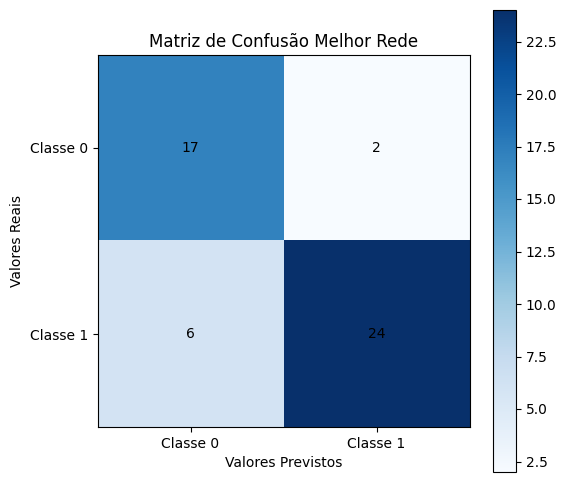

In [12]:
# Matriz de confusão da melhor rede
conf_matrix_melhor = confusion_matrix(y_de_teste, y_pred_melhor)

# Plot da matriz de confusão
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix_melhor, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusão Melhor Rede')
plt.xticks([0, 1], ['Classe 0', 'Classe 1'])
plt.yticks([0, 1], ['Classe 0', 'Classe 1'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix_melhor[i, j]), ha='center', va='center', color='white' if conf_matrix_melhor[i, j] > 50 else 'black')

plt.colorbar()
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.grid(False)
plt.show()
